In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load full dataset with optimizations

df = pd.read_excel('/content/Online Retail (1).xlsx')

In [ ]:
# Data Cleaning
df = df.dropna(subset=['CustomerID'])  # Drop rows with missing CustomerID
df = df[df['Quantity'] > 0]  # Remove negative quantities
df = df[df['UnitPrice'] > 0]  # Remove negative prices

In [ ]:
# Feature Engineering
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
customer_data = df.groupby('CustomerID').agg({'Quantity': 'sum', 'TotalPrice': 'sum'}).reset_index()

In [ ]:
# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['Quantity', 'TotalPrice']])

In [ ]:

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
customer_data['KMeans_Cluster'] = kmeans_labels

In [ ]:

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
customer_data['DBSCAN_Cluster'] = dbscan_labels

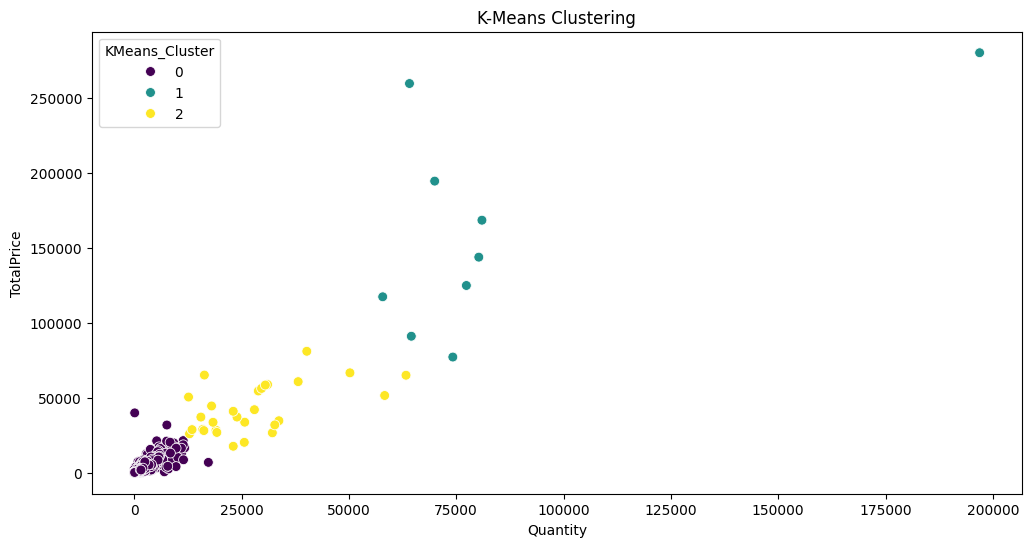

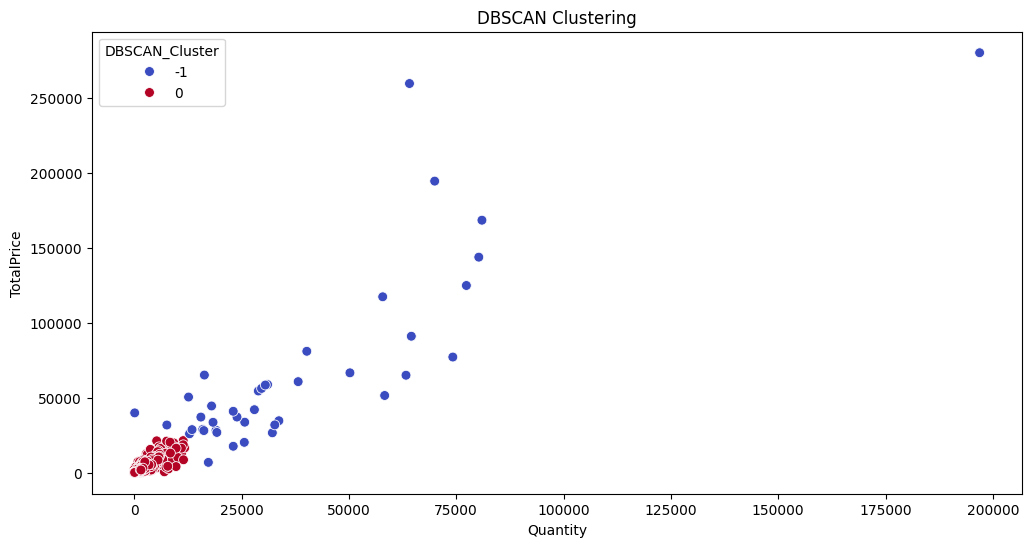

In [ ]:
# Plot Results
plt.figure(figsize=(12, 6))
sns.scatterplot(data=customer_data, x='Quantity', y='TotalPrice', hue='KMeans_Cluster', palette='viridis', s=50)
plt.title('K-Means Clustering')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=customer_data, x='Quantity', y='TotalPrice', hue='DBSCAN_Cluster', palette='coolwarm', s=50)
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
# Compare Results
kmeans_clusters = customer_data['KMeans_Cluster'].nunique()
dbscan_clusters = customer_data['DBSCAN_Cluster'].nunique() - (1 if -1 in dbscan_labels else 0)
noise_points = (dbscan_labels == -1).sum()

In [ ]:
kmeans_clusters, dbscan_clusters, noise_points

(3, 1, 41)